In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
Data = pd.read_csv('Mall_Customers.csv')
Data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
# Exploring the Dataset
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
# Dropping CustomerID because it is not useful for segmentation
Data = Data.drop('CustomerID', axis=1)

In [ ]:
# Convert Gender(which is Genre here) to numeric
Data['Genre'] = Data['Genre'].map({'Male': 0, 'Female': 1})

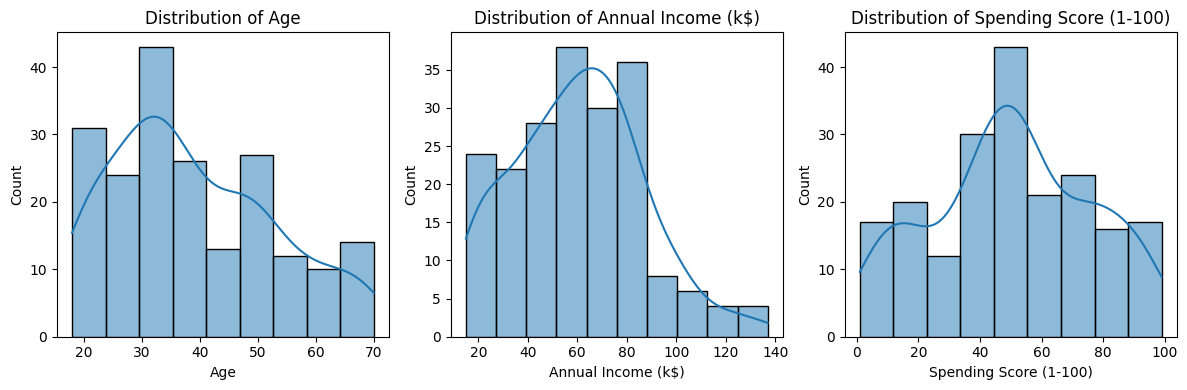

In [ ]:
# Visualize Distributions
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(Data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The code snippet visualizes the distributions of three numerical features in a dataset: **Age**, **Annual Income (k$)**, and **Spending Score (1-100)**. This is done using histograms with overlaid kernel density estimates (KDE) to provide a clearer understanding of the data's distribution patterns.

1. **Figure Setup**: The `plt.figure(figsize=(12, 4))` line initializes a new figure with a specified size of 12 inches wide and 4 inches tall. This ensures that the plots are large enough to be easily readable.

2. **Loop Through Columns**: The `for` loop iterates over a list of column names (`['Age', 'Annual Income (k$)', 'Spending Score (1-100)']`). For each column, it creates a subplot to display the distribution of the corresponding feature.

3. **Subplots**: The `plt.subplot(1, 3, i + 1)` line creates a grid of 1 row and 3 columns for subplots, with the current plot being placed in the `(i + 1)`th position. This ensures that all three histograms are displayed side by side in a single row.

4. **Histogram with KDE**: The `sns.histplot(Data[col], kde=True)` line generates a histogram for the current column (`col`) from the dataset Data. The `kde=True` argument overlays a kernel density estimate curve on the histogram, providing a smooth approximation of the data's probability density.

5. **Titles**: The `plt.title(f'Distribution of {col}')` line sets a title for each subplot, dynamically including the column name (`col`) to indicate which feature's distribution is being visualized.

6. **Layout Adjustment**: The `plt.tight_layout()` line adjusts the spacing between subplots to prevent overlapping of titles, axes, or other elements, ensuring a clean and organized appearance.

7. **Display the Plot**: Finally, `plt.show()` renders the figure, displaying the three histograms side by side.

This visualization helps identify patterns, such as skewness, multimodality, or outliers, in the distributions of the selected features. It is a crucial step in exploratory data analysis (EDA) for understanding the dataset and preparing it for further analysis or modeling.

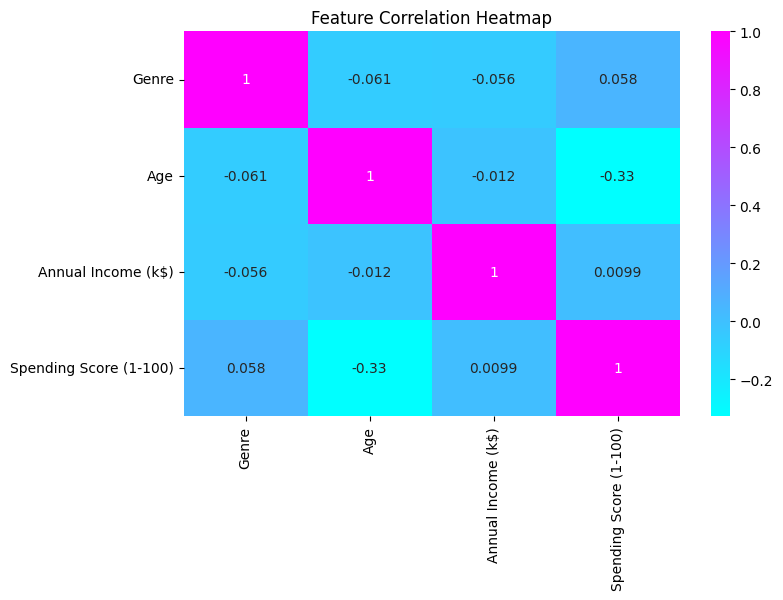

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(Data.corr(), annot=True, cmap='cool')
plt.title("Feature Correlation Heatmap")
plt.show()

In [18]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

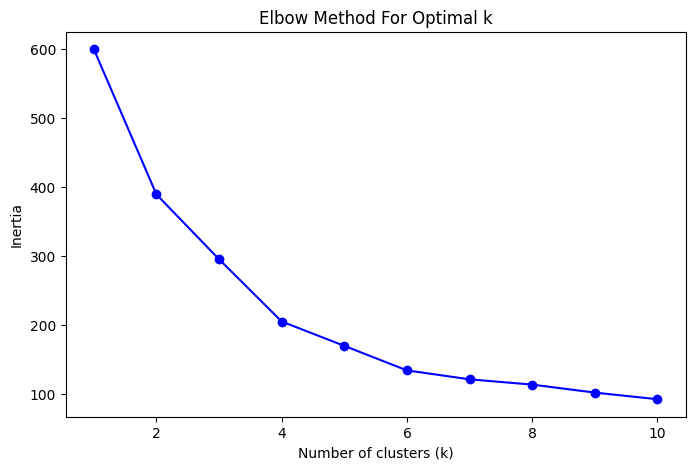

In [ ]:
# Elbow Method to find optimal K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

The code implements the **Elbow Method**, a technique used to determine the optimal number of clusters (`k`) for a K-Means clustering algorithm. This method evaluates the "inertia" (or within-cluster sum of squared distances) for different values of `k` and identifies the point where adding more clusters provides diminishing returns in reducing inertia.

1. **Initialization**: 
   - An empty list `inertia` is created to store the inertia values for each value of `k`.
   - The range of possible cluster numbers (`k_range`) is defined as `range(1, 11)`, meaning the code will evaluate cluster counts from 1 to 10.

2. **Iterative Clustering**:
   - A `for` loop iterates through each value of `k` in `k_range`.
   - For each `k`, a `KMeans` model is initialized with `n_clusters=k` and a fixed `random_state=42` to ensure reproducibility.
   - The `fit()` method is called on the scaled dataset (`scaled_data`) to perform clustering.
   - The inertia (sum of squared distances of samples to their nearest cluster center) is computed and appended to the `inertia` list.

3. **Visualization**:
   - A new figure is created with `plt.figure(figsize=(8, 5))` to set the plot size.
   - The `plt.plot()` function is used to plot the values of `k` (x-axis) against the corresponding inertia values (y-axis) as a line graph with markers (`'bo-'`).
   - Labels for the x-axis (`'Number of clusters (k)'`) and y-axis (`'Inertia'`) are added, along with a title (`'Elbow Method For Optimal k'`).

4. **Elbow Identification**:
   - The resulting plot shows how inertia decreases as the number of clusters increases. Initially, the inertia drops significantly as `k` increases, but after a certain point, the rate of decrease slows down. This point, resembling an "elbow," indicates the optimal number of clusters.
   - Selecting `k` at the elbow balances model complexity and clustering quality, avoiding overfitting or underfitting.

This process is a critical step in clustering analysis, as it helps determine the most appropriate number of clusters for segmenting the data effectively.

In [20]:
# Train KMeans with Optimal K (e.g., 5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
Data['Cluster'] = kmeans.fit_predict(scaled_data)

The code snippet trains a K-Means clustering model using the optimal number of clusters (`k_optimal`) and assigns each data point to a cluster. Here's a detailed explanation:

1. **Optimal Number of Clusters**: The variable `k_optimal` is set to 5, which represents the optimal number of clusters determined earlier, likely using the Elbow Method. This value ensures that the clustering model balances simplicity and effectiveness in segmenting the data.

2. **K-Means Initialization**: The `KMeans` class from `sklearn.cluster` is used to create a K-Means clustering model. The parameter `n_clusters=k_optimal` specifies the number of clusters (5 in this case), and `random_state=42` ensures reproducibility by fixing the random seed. This guarantees consistent results across multiple runs of the code.

3. **Model Training and Prediction**: The `fit_predict()` method is called on the scaled dataset (`scaled_data`). This method performs two tasks:
   - **Training**: The K-Means algorithm identifies the optimal positions of the cluster centroids by minimizing the within-cluster sum of squared distances.
   - **Prediction**: Each data point is assigned to the nearest cluster based on the trained centroids. The method returns an array of cluster labels, where each label corresponds to the cluster index (e.g., 0, 1, 2, etc.) for a data point.

4. **Adding Cluster Labels to the Dataset**: The resulting cluster labels are stored in a new column named `'Cluster'` in the original dataset (Data). This allows the dataset to include the cluster assignments, making it easier to analyze or visualize the segmentation results.

In summary, this code trains a K-Means model with 5 clusters, assigns each data point to a cluster, and appends the cluster labels to the dataset. This step is crucial for customer segmentation, as it groups customers into distinct clusters based on their similarities, enabling targeted marketing strategies or personalized services.

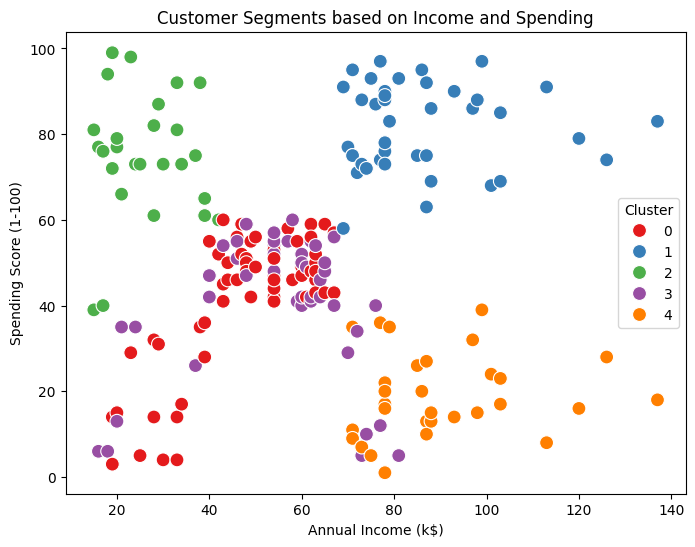

In [22]:
# Visualize Clusters (2D)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=Data['Annual Income (k$)'],
    y=Data['Spending Score (1-100)'],
    hue=Data['Cluster'],
    palette='Set1',
    s=100
)
plt.title('Customer Segments based on Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

The line of code `plt.title('Customer Segments based on Income and Spending')` sets the title for the plot being created using Matplotlib. This title provides context to the viewer, explaining what the visualization represents. In this case, the title indicates that the plot displays customer segments based on their **Annual Income** and **Spending Score**.

Titles are an essential part of data visualization as they summarize the purpose of the chart, making it easier for the audience to understand the information being conveyed. By specifying `'Customer Segments based on Income and Spending'`, the title highlights that the plot is related to customer segmentation, likely derived from a clustering algorithm such as K-Means. The segmentation is visualized in terms of two key features: **Annual Income (k$)** on the x-axis and **Spending Score (1-100)** on the y-axis.

This line is part of a larger visualization workflow and ensures that the plot is self-explanatory, even when viewed independently of the surrounding code or documentation.

In [24]:
# Cluster Profile Summary
cluster_summary = Data.groupby('Cluster').mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
             Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.568966  55.275862           47.620690               41.706897
1        0.550000  32.875000           86.100000               81.525000
2        0.576923  25.769231           26.115385               74.846154
3        0.600000  26.733333           54.311111               40.911111
4        0.483871  44.387097           89.774194               18.483871
